In [1]:
# Example-specific imports are in individual cells below; here we
# just import stuff we reuse repeatedly.
from pliers.extractors import merge_results
from pliers.tests.utils import get_test_data_path
from os.path import join
from matplotlib import pyplot as plt

%matplotlib inline

# Pliers Quickstart
This notebook contains a few examples that demonstrate how to extract various kinds of features with pliers. We start with very simple examples, and gradually scale up in complexity.

## Face detection
This first example uses the face_recognition package's location extraction method to detect the location of Barack Obama's face within a single image. The tools used to do this are completely local (i.e., the image isn't sent to an external API).

We output the result as a pandas DataFrame; the `'face_locations`' column contains the coordinates of the bounding box in CSS format (i.e., top, right, bottom, and left edges).

In [2]:
from pliers.extractors import FaceRecognitionFaceLocationsExtractor

# A picture of Barack Obama
image = join(get_test_data_path(), 'image', 'obama.jpg')

# Initialize Extractor
ext = FaceRecognitionFaceLocationsExtractor()

# Apply Extractor to image
result = ext.transform(image)

result.to_df()

,onset,order,duration,object_id,face_locations
0,NaN,NaN,NaN,0,"(142, 349, 409, 82)"


## Face detection with multiple inputs
What if we want to run the face detector on multiple images? Naively, we could of course just loop over input images and apply the Extractor to each one. But pliers makes this even easier for us, by natively accepting iterables as inputs. The following code is almost identical to the above snippet. The only notable difference is that, because the result we get back is now also a list (because the features extracted from each image are stored separately), we need to explicitly combine the results using the `merge_results` utility.

In [3]:
from pliers.extractors import FaceRecognitionFaceLocationsExtractor, merge_results

images = ['apple.jpg', 'obama.jpg', 'thai_people.jpg']
images = [join(get_test_data_path(), 'image', img) for img in images]

ext = FaceRecognitionFaceLocationsExtractor()
results = ext.transform(images)
df = merge_results(results)
df

Stim: 3it [00:00,  4.40it/s]


,source_file,onset,class,filename,stim_name,history,duration,order,object_id,FaceRecognitionFaceLocationsExtractor#face_locations
0,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,NaN,ImageStim,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,obama.jpg,,NaN,NaN,0,"(142, 349, 409, 82)"
1,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,NaN,ImageStim,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,thai_people.jpg,,NaN,NaN,0,"(236, 862, 325, 772)"
2,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,NaN,ImageStim,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,thai_people.jpg,,NaN,NaN,1,"(104, 581, 211, 474)"
3,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,NaN,ImageStim,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,thai_people.jpg,,NaN,NaN,2,"(365, 782, 454, 693)"
4,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,NaN,ImageStim,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,thai_people.jpg,,NaN,NaN,3,"(265, 444, 355, 354)"


Note how the merged pandas DataFrame contains 5 rows, even though there were only 3 input images. The reason is that there are 5 detected faces across the inputs (0 in the first image, 1 in the second, and 4 in the third). You can discern the original sources from the `stim_name` and `source_file` columns.

## Face detection using a remote API
The above examples use an entirely local package (`face_recognition`) for feature extraction. In this next example, we use the Google Cloud Vision API to extract various face-related attributes from an image of Barack Obama. The syntax is identical to the first example, save for the use of the `GoogleVisionAPIFaceExtractor` instead of the `FaceRecognitionFaceLocationsExtractor`. Note, however, that successful execution of this code requires you to have a `GOOGLE_APPLICATION_CREDENTIALS` environment variable pointing to your Google credentials JSON file. See the documentation for more details.

In [4]:
from pliers.extractors import GoogleVisionAPIFaceExtractor

ext = GoogleVisionAPIFaceExtractor()
image = join(get_test_data_path(), 'image', 'obama.jpg')
result = ext.transform(image)

result.to_df(format='long', timing=False, object_id=False)

,feature,value
0,face1_boundingPoly_vertex1_x,34
1,face1_boundingPoly_vertex1_y,3
2,face1_boundingPoly_vertex2_x,413
3,face1_boundingPoly_vertex2_y,3
4,face1_boundingPoly_vertex3_x,413
5,face1_boundingPoly_vertex3_y,444
6,face1_boundingPoly_vertex4_x,34
7,face1_boundingPoly_vertex4_y,444
8,face1_fdBoundingPoly_vertex1_x,81
9,face1_fdBoundingPoly_vertex1_y,112


Notice that the output in this case contains many more features. That's because the Google face recognition service gives us back a lot more information than just the location of the face within the image. Also, the example illustrates our ability to control the format of the output, by returning the data in "long" format, and suppressing output of columns that are uninformative in this context.

## Sentiment analysis on text
Here we use the VADER sentiment analyzer (Hutto & Gilbert, 2014) implemented in the `nltk` package to extract sentiment for (a) a coherent block of text, and (b) each word in the text separately. This example also introduces the `Stim` hierarchy of objects explicitly, whereas the initialization of `Stim` objects was implicit in the previous examples.

#### Treat text as a single block

In [5]:
from pliers.stimuli import TextStim, ComplexTextStim
from pliers.extractors import VADERSentimentExtractor, merge_results

raw = """We're not claiming that VADER is a very good sentiment analysis tool.
Sentiment analysis is a really, really difficult problem. But just to make a
point, here are some clearly valenced words: disgusting, wonderful, poop,
sunshine, smile."""

# First example: we treat all text as part of a single token
text = TextStim(text=raw)

ext = VADERSentimentExtractor()
results = ext.transform(text)
results.to_df()

,onset,order,duration,object_id,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,NaN,NaN,NaN,0,0.19,0.51,0.3,0.6787


#### Analyze each word individually

In [6]:
# Second example: we construct a ComplexTextStim, which will
# cause each word to be represented as a separate TextStim.
text = ComplexTextStim(text=raw)

ext = VADERSentimentExtractor()
results = ext.transform(text)

# Because results is a list of ExtractorResult objects
# (one per word), we need to merge the results explicitly.
df = merge_results(results, object_id=False)
df.head(10)

Stim: 48it [00:00, 8779.67it/s]


,source_file,onset,class,filename,stim_name,history,duration,order,VADERSentimentExtractor#sentiment_compound,VADERSentimentExtractor#sentiment_neg,VADERSentimentExtractor#sentiment_neu,VADERSentimentExtractor#sentiment_pos
0,NaN,0.0,TextStim,NaN,text[We],ComplexTextStim->ComplexTextIterator/TextStim,NaN,0,0.0000,0.0,1.0,0.0
1,NaN,0.0,TextStim,NaN,text['re],ComplexTextStim->ComplexTextIterator/TextStim,NaN,1,0.0000,0.0,1.0,0.0
2,NaN,0.0,TextStim,NaN,text[not],ComplexTextStim->ComplexTextIterator/TextStim,NaN,2,0.0000,0.0,1.0,0.0
3,NaN,0.0,TextStim,NaN,text[claiming],ComplexTextStim->ComplexTextIterator/TextStim,NaN,3,0.0000,0.0,1.0,0.0
4,NaN,0.0,TextStim,NaN,text[that],ComplexTextStim->ComplexTextIterator/TextStim,NaN,4,0.0000,0.0,1.0,0.0
5,NaN,0.0,TextStim,NaN,text[VADER],ComplexTextStim->ComplexTextIterator/TextStim,NaN,5,0.0000,0.0,1.0,0.0
6,NaN,0.0,TextStim,NaN,text[is],ComplexTextStim->ComplexTextIterator/TextStim,NaN,6,0.0000,0.0,1.0,0.0
7,NaN,0.0,TextStim,NaN,text[a],ComplexTextStim->ComplexTextIterator/TextStim,NaN,7,0.0000,0.0,0.0,0.0
8,NaN,0.0,TextStim,NaN,text[very],ComplexTextStim->ComplexTextIterator/TextStim,NaN,8,0.0000,0.0,1.0,0.0
9,NaN,0.0,TextStim,NaN,text[good],ComplexTextStim->ComplexTextIterator/TextStim,NaN,9,0.4404,0.0,0.0,1.0


## Extract chromagram from an audio clip
We have an audio clip, and we'd like to compute its chromagram (i.e., to extract the normalized energy in each of the 12 pitch classes). This is trivial thanks to pliers' support for the `librosa` package, which contains all kinds of useful functions for spectral feature extraction.

In [7]:
from pliers.extractors import ChromaSTFTExtractor

audio = join(get_test_data_path(), 'audio', 'barber.wav')
# Audio is sampled at 11KHz; let's compute power in 1 sec bins
ext = ChromaSTFTExtractor(hop_length=11025)
result = ext.transform(audio).to_df()
result.head(10)

,onset,order,duration,object_id,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11
0,0.0,NaN,1.0,0,0.893229,0.580649,0.537203,0.781329,0.791074,0.450180,0.547222,0.344074,0.396035,0.310631,0.338300,1.000000
1,1.0,NaN,1.0,0,0.294194,0.197414,0.183005,0.218851,0.393326,0.308403,0.306165,0.470528,1.000000,0.352208,0.299830,0.551487
2,2.0,NaN,1.0,0,0.434900,0.235230,0.210706,0.299252,0.480551,0.393670,0.380633,0.400774,1.000000,0.747835,0.565902,0.905888
3,3.0,NaN,1.0,0,0.584723,1.000000,0.292496,0.280725,0.126438,0.141413,0.095718,0.051614,0.169491,0.159829,0.104278,0.152245
4,4.0,NaN,1.0,0,0.330675,0.093160,0.050093,0.110299,0.124181,0.195670,0.176633,0.154360,0.799665,1.000000,0.324705,0.299411
5,5.0,NaN,1.0,0,0.163303,0.166029,0.137458,0.674934,0.307667,0.444728,1.000000,0.363117,0.051563,0.056137,0.257512,0.311271
6,6.0,NaN,1.0,0,0.429001,0.576284,0.477286,0.629205,1.000000,0.683207,0.520680,0.550905,0.463083,0.136868,0.139903,0.516497
7,7.0,NaN,1.0,0,0.153344,0.061214,0.071127,0.156032,1.000000,0.266781,0.061097,0.100614,0.277248,0.080686,0.102179,0.560139
8,8.0,NaN,1.0,0,1.000000,0.179003,0.003033,0.002940,0.007769,0.001853,0.012441,0.065445,0.013986,0.002070,0.008418,0.250575
9,9.0,NaN,1.0,0,1.000000,0.195387,0.021611,0.028680,0.019289,0.018033,0.054944,0.047623,0.011615,0.031029,0.274826,0.840266


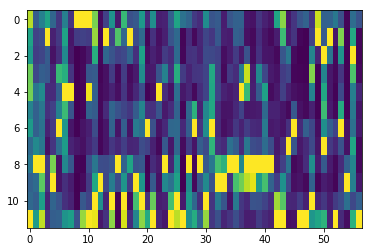

In [8]:
# And a plot of the chromagram...
plt.imshow(result.iloc[:, 4:].values.T, aspect='auto')

## Sentiment analysis on speech transcribed from audio
So far all of our examples involve the application of a feature extractor to an input of the expected modality (e.g., a text sentiment analyzer applied to text, a face recognizer applied to an image, etc.). But we often want to extract features that require us to first *convert* our input to a different modality. Let's see how pliers handles this kind of situation.

Say we have an audio clip. We want to run sentiment analysis on the audio. This requires us to first transcribe any speech contained in the audio. As it turns out, we don't have to do anything special here; we can just feed an audio clip directly to an `Extractor` class that expects a text input (e.g., the `VADER` sentiment analyzer we used earlier). How? Magic! Pliers is smart enough to implicitly convert the audio clip to a `ComplexTextStim` internally. By default, it does this using IBM's Watson speech transcription API. Which means you'll need to make sure your API key is set up properly in order for the code below to work. (But if you'd rather use, say, Google's Cloud Speech API, you could easily configure pliers to make that the default for audio-to-text conversion.)

In [9]:
audio = join(get_test_data_path(), 'audio', 'homer.wav')
ext = VADERSentimentExtractor()
result = ext.transform(audio)
df = merge_results(result, object_id=False)
df

Stim: 8it [00:00, 6028.46it/s]


,source_file,onset,class,filename,stim_name,history,duration,order,VADERSentimentExtractor#sentiment_compound,VADERSentimentExtractor#sentiment_neg,VADERSentimentExtractor#sentiment_neu,VADERSentimentExtractor#sentiment_pos
0,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,0.04,TextStim,NaN,text[engage],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.46,0,0.34,0.0,0.0,1.0
1,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,0.50,TextStim,NaN,text[because],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.37,1,0.00,0.0,1.0,0.0
2,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,0.87,TextStim,NaN,text[we],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.22,2,0.00,0.0,1.0,0.0
3,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,1.09,TextStim,NaN,text[obey],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.51,3,0.00,0.0,1.0,0.0
4,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,1.60,TextStim,NaN,text[the],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.16,4,0.00,0.0,1.0,0.0
5,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,1.76,TextStim,NaN,text[laws],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.40,5,0.00,0.0,1.0,0.0
6,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,2.16,TextStim,NaN,text[of],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.14,6,0.00,0.0,1.0,0.0
7,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,2.30,TextStim,NaN,text[thermodynamics],AudioStim->IBMSpeechAPIConverter/ComplexTextSt...,0.99,7,0.00,0.0,1.0,0.0


## Object recognition on selectively sampled video frames
A common scenario when analyzing video is to want to apply some kind of feature extraction tool to individual video frames (i.e., still images). Often, there's little to be gained by analyzing every single frame, so we want to sample frames with some specified frequency. The following example illustrates how easily this can be accomplished in pliers. It also demonstrates the concept of *chaining* multiple Transformer objects. We first convert a video to a series of images, and then apply an object-detection `Extractor` to each image.

Note, as with other examples above, that the `ClarifaiAPIExtractor` wraps the Clarifai object recognition API, so you'll need to have an API key set up appropriately (if you don't have an API key, and don't want to set one up, you can replace `ClarifaiAPIExtractor` with `TensorFlowInceptionV3Extractor` to get similar, though not quite as accurate, results).

In [10]:
from pliers.filters import FrameSamplingFilter
from pliers.extractors import ClarifaiAPIExtractor, merge_results

video = join(get_test_data_path(), 'video', 'small.mp4')

# Sample 2 frames per second
sampler = FrameSamplingFilter(hertz=2)
frames = sampler.transform(video)

ext = ClarifaiAPIExtractor()
results = ext.transform(frames)
df = merge_results(results, )
df

1it [00:02,  2.48s/it]
Stim: 100%|██████████| 12/12 [00:00<00:00, 101680.10it/s]


,source_file,onset,class,filename,stim_name,history,duration,order,object_id,ClarifaiAPIExtractor#Lego,...,ClarifaiAPIExtractor#power,ClarifaiAPIExtractor#precision,ClarifaiAPIExtractor#production,ClarifaiAPIExtractor#research,ClarifaiAPIExtractor#robot,ClarifaiAPIExtractor#science,ClarifaiAPIExtractor#still life,ClarifaiAPIExtractor#studio,ClarifaiAPIExtractor#technology,ClarifaiAPIExtractor#toy
0,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,0.0,VideoFrameStim,NaN,frame[0],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.949353,...,NaN,0.767964,NaN,NaN,0.892890,0.823121,0.898390,0.714794,0.946736,0.900628
1,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,0.5,VideoFrameStim,NaN,frame[15],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.948389,...,NaN,0.743388,NaN,NaN,0.887668,0.826262,0.900226,0.747545,0.951705,0.892195
2,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,1.0,VideoFrameStim,NaN,frame[30],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.951566,...,NaN,0.738823,NaN,NaN,0.885989,0.801925,0.908438,0.756304,0.948202,0.903330
3,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,1.5,VideoFrameStim,NaN,frame[45],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.951050,...,NaN,0.794678,0.710889,0.749307,0.893252,0.892987,0.877005,NaN,0.962567,0.857956
4,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,2.0,VideoFrameStim,NaN,frame[60],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.872721,...,0.756543,0.802734,NaN,NaN,0.866742,0.816107,0.802523,NaN,0.956920,0.803250
5,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,2.5,VideoFrameStim,NaN,frame[75],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.930966,...,NaN,0.763779,NaN,NaN,0.841595,0.755196,0.885707,0.713024,0.937848,0.876500
6,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,3.0,VideoFrameStim,NaN,frame[90],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.866936,...,0.749151,0.749939,NaN,NaN,0.862391,0.824693,0.806569,NaN,0.948547,0.793848
7,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,3.5,VideoFrameStim,NaN,frame[105],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.957496,...,NaN,0.775053,NaN,NaN,0.895434,0.839599,0.890773,0.720677,0.949031,0.898136
8,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,4.0,VideoFrameStim,NaN,frame[120],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.954910,...,NaN,0.785069,NaN,NaN,0.888534,0.833464,0.895954,0.752757,0.948506,0.897712
9,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...,4.5,VideoFrameStim,NaN,frame[135],VideoStim->FrameSamplingFilter/VideoFrameColle...,0.50,NaN,0,0.957653,...,NaN,0.796410,0.711184,NaN,0.897311,0.854389,0.899367,0.726466,0.951222,0.893269


The resulting data frame has 41 columns (!), most of which are individual object labels like 'lego', 'toy', etc., selected for us by the Clarifai API on the basis of the content detected in the video (we could have also forced the API to return values for specific labels).

## Multiple extractors
So far we've only used a single `Extractor` at a time to extract information from our inputs. Now we'll start to get a little more ambitious. Let's say we have a video that we want to extract *lots* of different features from--in multiple modalities. Specifically, we want to extract all of the following:

* Object recognition and face detection applied to every 10th frame of the video;
* A second-by-second estimate of spectral power in the speech frequency band;
* A word-by-word speech transcript;
* Estimates of several lexical properties (e.g., word length, written word frequency, etc.) for every word in the transcript;
* Sentiment analysis applied to the entire transcript.

We've already seen some of these features extracted individually, but now we're going to extract *all* of them at once. As it turns out, the code looks almost exactly like a concatenated version of several of our examples above.

In [11]:
from pliers.tests.utils import get_test_data_path
from os.path import join
from pliers.filters import FrameSamplingFilter
from pliers.converters import GoogleSpeechAPIConverter
from pliers.extractors import (ClarifaiAPIExtractor, GoogleVisionAPIFaceExtractor,
                               ComplexTextExtractor, PredefinedDictionaryExtractor,
                               STFTAudioExtractor, VADERSentimentExtractor,
                               merge_results)

video = join(get_test_data_path(), 'video', 'obama_speech.mp4')

# Store all the returned features in a single list (nested lists
# are fine, the merge_results function will flatten everything)
features = []

# Sample video frames and apply the image-based extractors
sampler = FrameSamplingFilter(every=10)
frames = sampler.transform(video)

obj_ext = ClarifaiAPIExtractor()
obj_features = obj_ext.transform(frames)
features.append(obj_features)

face_ext = GoogleVisionAPIFaceExtractor()
face_features = face_ext.transform(frames)
features.append(face_features)

# Power in speech frequencies
stft_ext = STFTAudioExtractor(freq_bins=[(100, 300)])
speech_features = stft_ext.transform(video)
features.append(speech_features)

# Explicitly transcribe the video--we could also skip this step
# and it would be done implicitly, but this way we can specify
# that we want to use the Google Cloud Speech API rather than
# the package default (IBM Watson)
text_conv = GoogleSpeechAPIConverter()
text = text_conv.transform(video)
                  
# Text-based features
text_ext = ComplexTextExtractor()
text_features = text_ext.transform(text)
features.append(text_features)

dict_ext = PredefinedDictionaryExtractor(
    variables=['affect/V.Mean.Sum', 'subtlexusfrequency/Lg10WF'])
norm_features = dict_ext.transform(text)
features.append(norm_features)

sent_ext = VADERSentimentExtractor()
sent_features = sent_ext.transform(text)
features.append(sent_features)

# Ask for data in 'long' format, and code extractor name as a separate
# column instead of prepending it to feature names.
df = merge_results(features, format='long', extractor_names='column')

# Output rows in a sensible order
df.sort_values(['extractor', 'feature', 'onset', 'duration', 'order']).head(10)

1it [00:01,  1.39s/it]
Stim: 100%|██████████| 11/11 [00:00<00:00, 94737.87it/s]
2it [00:01,  1.13it/s]
Stim: 100%|██████████| 11/11 [00:00<00:00, 35273.20it/s]


[MoviePy] Writing audio in /var/folders/34/77cx8txj1gvbdtt407_g6pth0000gn/T/tmps_854s5m.flac


100%|██████████| 105/105 [00:00<00:00, 1149.69it/s]

[MoviePy] Done.



Stim: 15it [00:00, 441.12it/s]
Stim: 15it [00:00, 7102.57it/s]


,object_id,onset,order,duration,feature,value,extractor,stim_name,class,filename,history,source_file
2,0,0.000000,NaN,0.833333,administration,0.970786,ClarifaiAPIExtractor,frame[0],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
296,0,0.833333,NaN,0.833333,administration,0.976996,ClarifaiAPIExtractor,frame[10],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
592,0,1.666667,NaN,0.833333,administration,0.972223,ClarifaiAPIExtractor,frame[20],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
887,0,2.500000,NaN,0.833333,administration,0.98288,ClarifaiAPIExtractor,frame[30],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1198,0,3.333333,NaN,0.833333,administration,0.94764,ClarifaiAPIExtractor,frame[40],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1492,0,4.166667,NaN,0.833333,administration,0.952409,ClarifaiAPIExtractor,frame[50],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1795,0,5.000000,NaN,0.833333,administration,0.951445,ClarifaiAPIExtractor,frame[60],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2096,0,5.833333,NaN,0.833333,administration,0.954552,ClarifaiAPIExtractor,frame[70],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2392,0,6.666667,NaN,0.833333,administration,0.953084,ClarifaiAPIExtractor,frame[80],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2695,0,7.500000,NaN,0.833333,administration,0.947371,ClarifaiAPIExtractor,frame[90],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...


The resulting pandas DataFrame is quite large; even for our 9-second video, we get back over 3,000 rows! Importantly, though, the DataFrame contains all kinds of metadata that makes it easy to filter and sort the results in whatever way we might want to (e.g., we can filter on the extractor, stim class, onset or duration, etc.).

## Multiple extractors with a Graph
The above code listing is already pretty terse, and has the advantage of being explicit about every step. But if it's brevity we're after, pliers is happy to oblige us. The package includes a `Graph` abstraction that allows us to load an arbitrary number of `Transformer` into a graph, and execute them all in one shot. The code below is functionally identical to the last example, but only about the third of the length. It also requires fewer imports, since `Transformer` objects that we don't need to initialize with custom arguments can be passed to the `Graph` as strings. 

The upshot of all this is that, in just a few lines of Python code, we're abvle to extract a broad range of multimodal features from video, image, audio or text inputs, using state-of-the-art tools and services!

In [12]:
from pliers.tests.utils import get_test_data_path
from os.path import join
from pliers.graph import Graph
from pliers.filters import FrameSamplingFilter
from pliers.extractors import (PredefinedDictionaryExtractor, STFTAudioExtractor,
                               merge_results)


video = join(get_test_data_path(), 'video', 'obama_speech.mp4')

# Define nodes
nodes = [
    (FrameSamplingFilter(every=10),
         ['ClarifaiAPIExtractor', 'GoogleVisionAPIFaceExtractor']),
    (STFTAudioExtractor(freq_bins=[(100, 300)])),
    ('GoogleSpeechAPIConverter',
         ['ComplexTextExtractor',
          PredefinedDictionaryExtractor(['affect/V.Mean.Sum',
                                         'subtlexusfrequency/Lg10WF']),
         'VADERSentimentExtractor'])
]

# Initialize and execute Graph
g = Graph(nodes)

# Arguments to merge_results can be passed in here
df = g.transform(video, format='long', extractor_names='column')

# Output rows in a sensible order
df.sort_values(['extractor', 'feature', 'onset', 'duration', 'order']).head(10)

1it [00:01,  1.41s/it]
Stim: 100%|██████████| 11/11 [00:00<00:00, 65443.04it/s]
Stim: 15it [00:00, 7712.01it/s]


,object_id,onset,order,duration,feature,value,extractor,stim_name,class,filename,history,source_file
2,0,0.000000,NaN,0.833333,administration,0.970786,ClarifaiAPIExtractor,frame[0],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
296,0,0.833333,NaN,0.833333,administration,0.976996,ClarifaiAPIExtractor,frame[10],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
592,0,1.666667,NaN,0.833333,administration,0.972223,ClarifaiAPIExtractor,frame[20],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
887,0,2.500000,NaN,0.833333,administration,0.98288,ClarifaiAPIExtractor,frame[30],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1198,0,3.333333,NaN,0.833333,administration,0.94764,ClarifaiAPIExtractor,frame[40],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1492,0,4.166667,NaN,0.833333,administration,0.952409,ClarifaiAPIExtractor,frame[50],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
1795,0,5.000000,NaN,0.833333,administration,0.951445,ClarifaiAPIExtractor,frame[60],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2096,0,5.833333,NaN,0.833333,administration,0.954552,ClarifaiAPIExtractor,frame[70],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2392,0,6.666667,NaN,0.833333,administration,0.953084,ClarifaiAPIExtractor,frame[80],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
2695,0,7.500000,NaN,0.833333,administration,0.947371,ClarifaiAPIExtractor,frame[90],VideoFrameStim,None,VideoStim->FrameSamplingFilter/VideoFrameColle...,/Users/tal/Dropbox/Code/pliers/pliers/tests/da...
